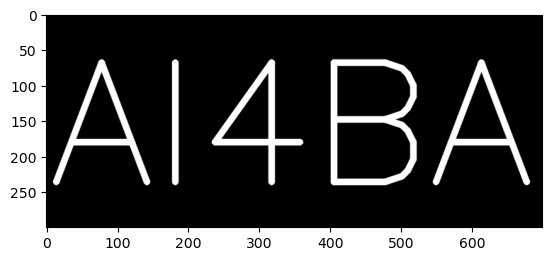

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np

def create_image_with_text(text, font_size):
    # Define image dimensions based on text length and font size
    width = 700  # Adjust the width as needed
    height = 300  # Adjust the height as needed
    
    # Create a black background image
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Define font type and scale
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = font_size
    color = (255, 255, 255)  # White color for the text
    thickness = int(font_size)  # Adjust thickness relative to font size
    
    # Get text size to center it on the image
    text_size = cv2.getTextSize(text, font, scale, thickness)[0]
    text_x = (image.shape[1] - text_size[0]) // 2
    text_y = (image.shape[0] + text_size[1]) // 2
    
    # Put text on the image
    cv2.putText(image, text, (text_x, text_y), font, scale, color, thickness, cv2.LINE_AA)
    
    return image

# Example usage
original = create_image_with_text("AI4BA", 8)

# Display the image
plt.imshow(original)

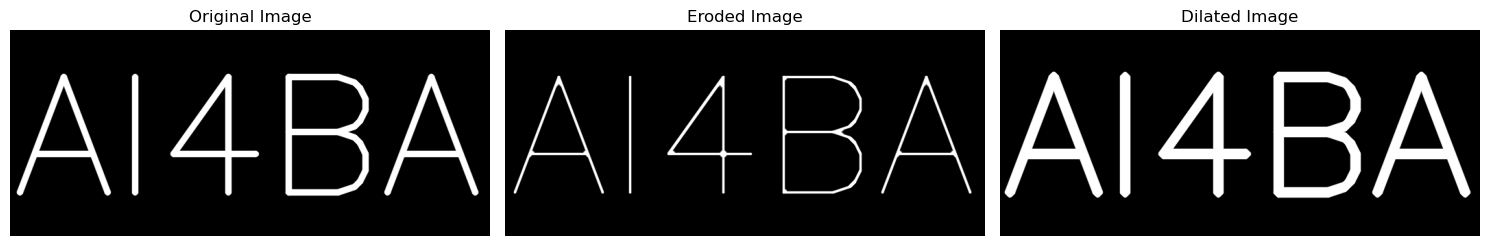

In [60]:

# Define kernels
kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3 , 3))
# 1. Erosion
eroded = cv2.erode(original, kernel_3x3, iterations=3)
dilated = cv2.dilate(original, kernel_3x3, iterations=3)

        
show_results([original, eroded, dilated], ['Original Image', 'Eroded Image', 'Dilated Image'])

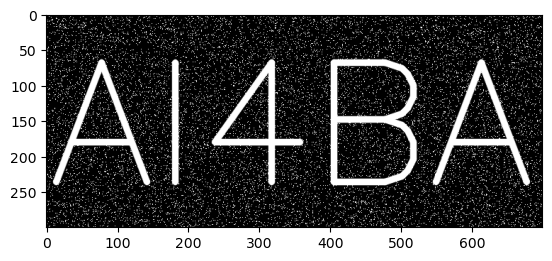

In [56]:
import cv2
import numpy as np
import random

def create_noisy_image_with_text(text, font_size, n_noise_points):
    # Define image dimensions based on text length and font size
    width = 700  # Adjust the width as needed
    height = 300  # Adjust the height as needed
    
    # Create a black background image
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Define font type and scale
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = font_size
    color = (255, 255, 255)  # White color for the text
    thickness = int(font_size)  # Adjust thickness relative to font size
    
    # Get text size to center it on the image
    text_size = cv2.getTextSize(text, font, scale, thickness)[0]
    text_x = (image.shape[1] - text_size[0]) // 2
    text_y = (image.shape[0] + text_size[1]) // 2
    
    # Put text on the image
    cv2.putText(image, text, (text_x, text_y), font, scale, color, thickness, cv2.LINE_AA)
    
    # Add random noise points
    for _ in range(n_noise_points):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        image[y, x] = (255, 255, 255)  # Add white noise points
    
    return image

# Example usage
result_image = create_noisy_image_with_text("AI4BA", 8, 15000)

# Save the image
cv2.imwrite("noisy_text_image.jpg", result_image)


# Display the image
plt.imshow(result_image)


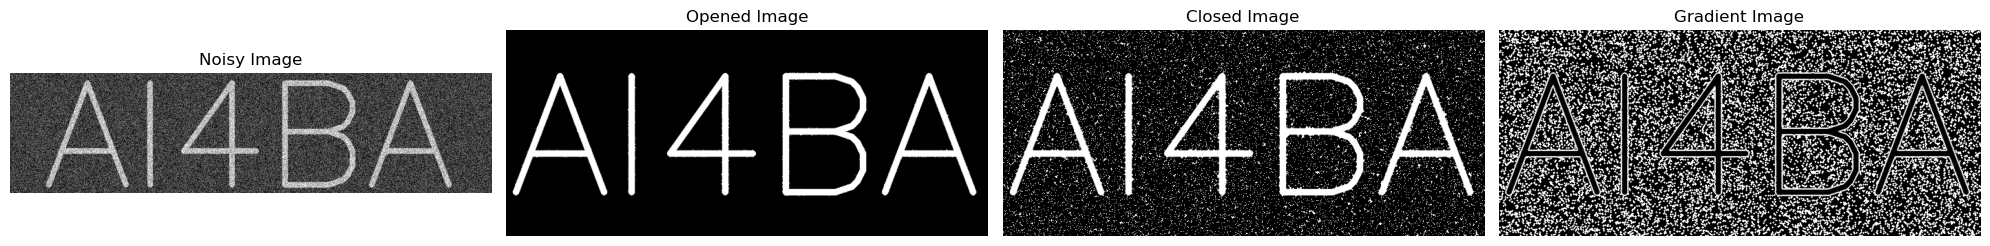

In [57]:


# 3. Opening (Erosion followed by Dilation)
opened = cv2.morphologyEx(result_image, cv2.MORPH_OPEN, kernel_3x3)

# 4. Closing (Dilation followed by Erosion)
closed = cv2.morphologyEx(result_image, cv2.MORPH_CLOSE, kernel_3x3)

# 5. Gradient (Difference between Dilation and Erosion)
gradient = cv2.morphologyEx(result_image, cv2.MORPH_GRADIENT, kernel_3x3)


show_results([noisy_image, opened, closed, gradient], ['Noisy Image', 'Opened Image', 'Closed Image', 'Gradient Image'])

1. Basic Morphological Operations Demo


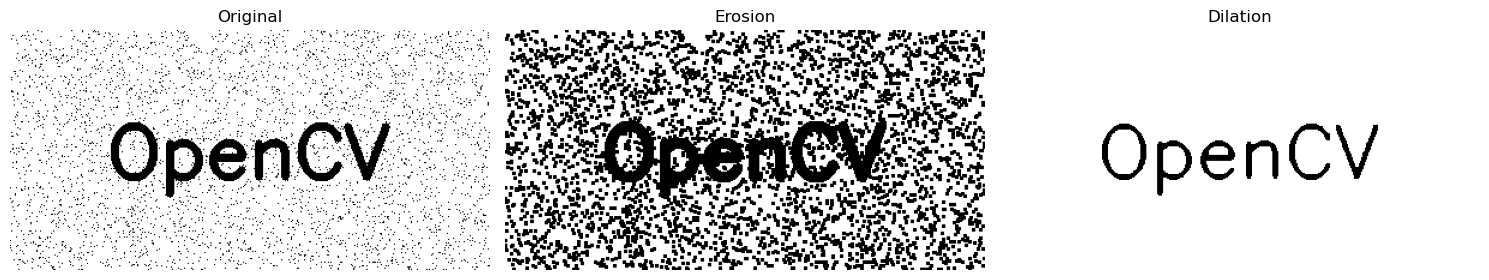

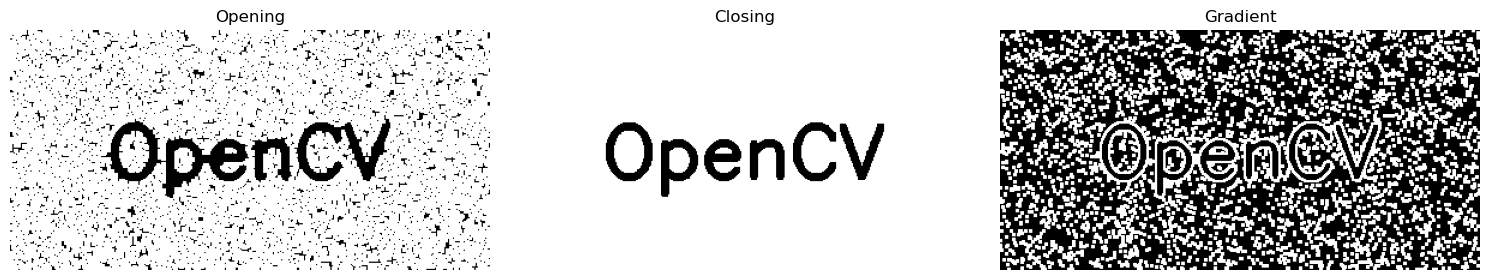


2. Noise Removal Applications


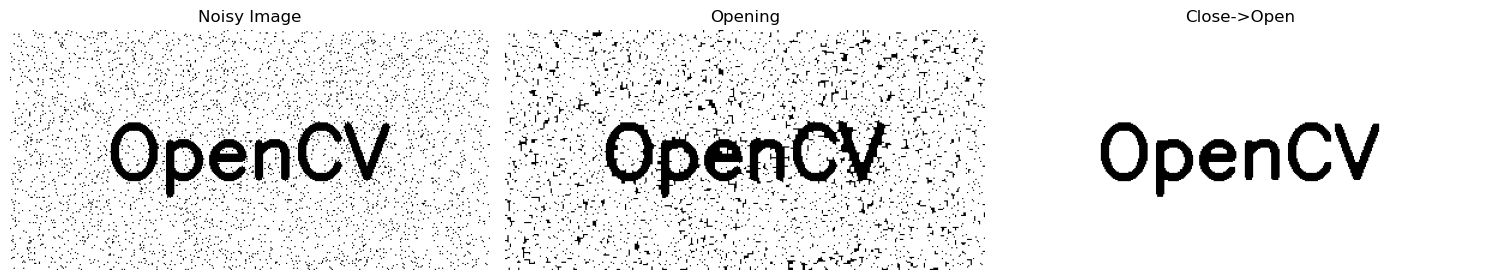

In [35]:


def morphological_operations_demo():
    # Create sample image
    original = create_sample_image()
    
    # Define kernels
    kernel_3x3 = np.ones((3, 3), np.uint8)
    kernel_5x5 = np.ones((5, 5), np.uint8)
    
    # 1. Erosion
    eroded = cv2.erode(original, kernel_3x3, iterations=1)
    
    # 2. Dilation
    dilated = cv2.dilate(original, kernel_3x3, iterations=1)
    
    # 3. Opening (Erosion followed by Dilation)
    opened = cv2.morphologyEx(original, cv2.MORPH_OPEN, kernel_3x3)
    
    # 4. Closing (Dilation followed by Erosion)
    closed = cv2.morphologyEx(original, cv2.MORPH_CLOSE, kernel_3x3)
    
    # 5. Gradient (Difference between Dilation and Erosion)
    gradient = cv2.morphologyEx(original, cv2.MORPH_GRADIENT, kernel_3x3)
    
    # Show basic operations
    show_results([original, eroded, dilated],
                ['Original', 'Erosion', 'Dilation'])
    
    # Show advanced operations
    show_results([opened, closed, gradient],
                ['Opening', 'Closing', 'Gradient'])

def noise_removal_demo():
    # Create noisy image
    img = create_sample_image()
    
    # Apply different combinations of operations
    kernel = np.ones((3, 3), np.uint8)
    
    # Method 1: Opening (removes small noise)
    denoised1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    # Method 2: Closing followed by Opening
    denoised2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    denoised2 = cv2.morphologyEx(denoised2, cv2.MORPH_OPEN, kernel)
    
    # Show results
    show_results([img, denoised1, denoised2],
                ['Noisy Image', 'Opening', 'Close->Open'])

def main():
    print("1. Basic Morphological Operations Demo")
    morphological_operations_demo()
    
    print("\n2. Noise Removal Applications")
    noise_removal_demo()

if __name__ == "__main__":
    main()